In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import eigh
from mpl_toolkits.mplot3d import axes3d

plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.linewidth'] = 2.0

# Generates a random Hermitian matrix with a given dimension and elemens in a square segment of the complex plane with side length nRange
def randH(dimension, nRange):
    A = np.array(np.random.uniform(-nRange, nRange, size=(dimension, dimension))) + 1.j*np.random.uniform(-nRange, nRange, size=(dimension, dimension))
    return (A + A.conj().T)/2


(50, 50) (3,) (3, 3)


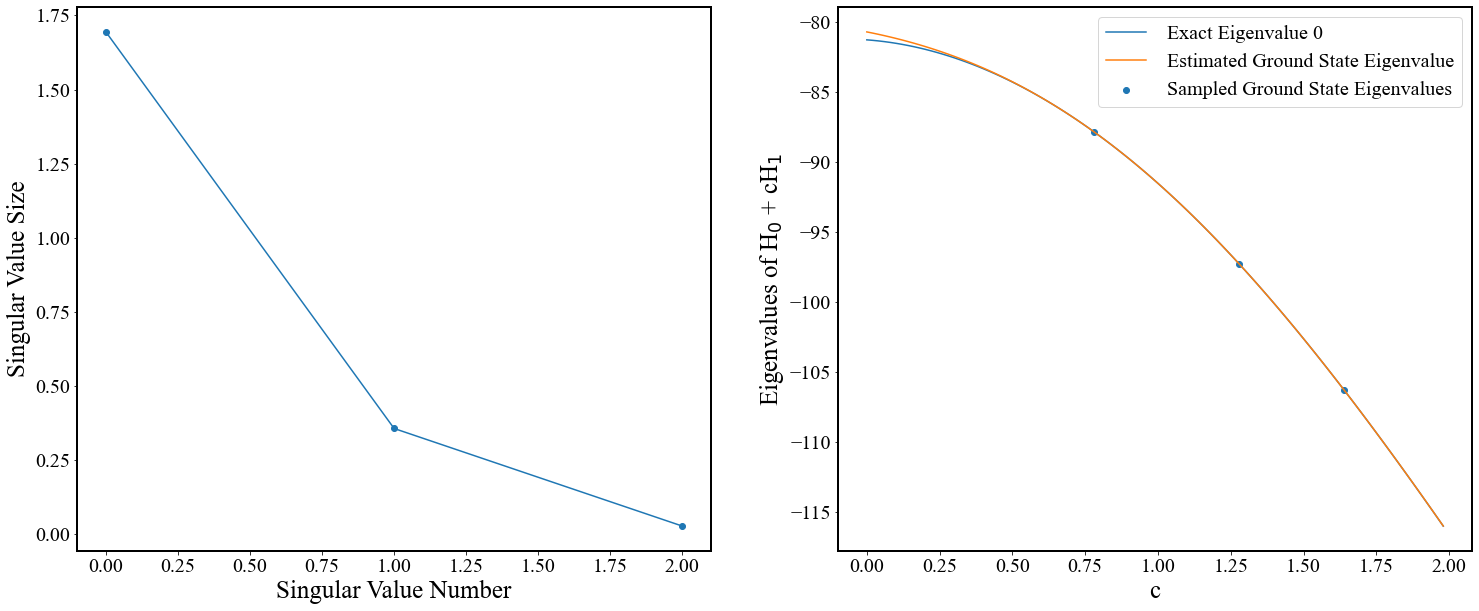

In [159]:
# Make Random Hermitian Matrices H_0 and H_1
dim = 50
elementSize = 10
H0 = randH(dim, elementSize)
H1 = randH(dim,elementSize/2)

# Collect eigenvalues of H_0 + c*H_1 for a range of c values
cmax = 2
c_vals = 100
n_rand = 3
step = cmax/c_vals                                                                                         # Interval between adjacent values of c
randoms = np.array([np.random.randint(0, c_vals-1) for i in range(n_rand)])               # Randomly chosen values of c for sampling in RBM
c_samples = np.sort(np.array(list(set(randoms))))
num_samples = len(c_samples)

ExactEigVals = np.empty((dim, c_vals))                                                                     # Exact eigenvalues of eigenvalue problem
ExactEigVecs = np.empty((dim, dim, c_vals), dtype='complex')
sampleEigVals = np.empty(num_samples)
X = np.empty((dim, num_samples), dtype='complex')                                                          # Collection of sampled exact eigenvectors
sample_index = 0                                                                                           # Index to keep track of which sample we are at
for i in range(c_vals):
    c = i*step
    ExactEigVals[:, i], ExactEigVecs[:, :, i] = np.linalg.eigh(H0 + c*H1)
    if sample_index < num_samples and i == c_samples[sample_index]:
        X[:, sample_index] = ExactEigVecs[:, 0, i]                                                                  # For this first part we will only keep the ground state indexed at 0
        sampleEigVals[sample_index] = ExactEigVals[0, i]
        sample_index += 1


# Perform SVD of sampled ground state wavefunctions, generate ground state estimator and Hamiltonian estimators
U, Svec, Vt = np.linalg.svd(X)                                                          # SVD of sampled eigenvectors
numSV = 3
print(np.shape(U), np.shape(Svec), np.shape(Vt))
newGS = np.empty((dim, numSV), dtype='complex')                                                  # Estimator of ground state
H0est = np.empty((numSV, numSV), dtype='complex')
H1est = np.empty((numSV, numSV), dtype='complex')
for i in range(numSV):
    newGS[:, i] = U[:, i]
for i in range(numSV):
    for j in range(numSV):
        H0est[i, j] = np.dot(newGS[:, i].T.conj(), np.dot(H0, newGS[:, j]))
        H1est[i, j] = np.dot(newGS[:, i].T.conj(), np.dot(H1, newGS[:, j]))

gsEstVals = np.empty(c_vals)
for i in range(c_vals):
    c = i*step
    gsEstVals[i] = np.linalg.eigh(H0est + c*H1est)[0][0]

# Plot results
crange = np.empty(c_vals)
for i in range(c_vals):
    crange[i] = i*step
f, ax = plt.subplots(nrows = 1, ncols=2)
f.set_figwidth(25)
f.set_figheight(10)
ax[0].plot([i for i in range(len(Svec))], Svec, marker="o")
ax[0].set_xlabel('Singular Value Number')
ax[0].set_ylabel('Singular Value Size')
for i in range(1):
    ax[1].plot(crange, ExactEigVals[i,:], label=' Exact Eigenvalue %i' %i)
    #plt.plot(1, newEigvals[i], label='EC Eigenvalue %i' %i, marker="d")

#ax[1].plot(crange, ExactEigVals[:, 0], label=' Exact Ground State Eigenvalue')
ax[1].scatter(step*c_samples, sampleEigVals, label=' Sampled Ground State Eigenvalues')
ax[1].plot(crange, gsEstVals, label=' Estimated Ground State Eigenvalue')
plt.xlabel('c')
plt.ylabel('Eigenvalues of H$_0$ + cH$_1$')
plt.legend(fontsize=20)
plt.show()


In [4]:
# Make Random Hermitian Matrices H_0 and H_1
dim = 50
elementSize = 10 
H0 = randH(dim, elementSize)
H1 = randH(dim,elementSize/2)

(2, 2, 50)


C:\Users\purcell\AppData\Local\Temp/ipykernel_18060/2841615135.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  estEigVals[j, i] = np.linalg.eig(H0est[:, :, j] + i*step*H1est[:, :, j])[0][0]


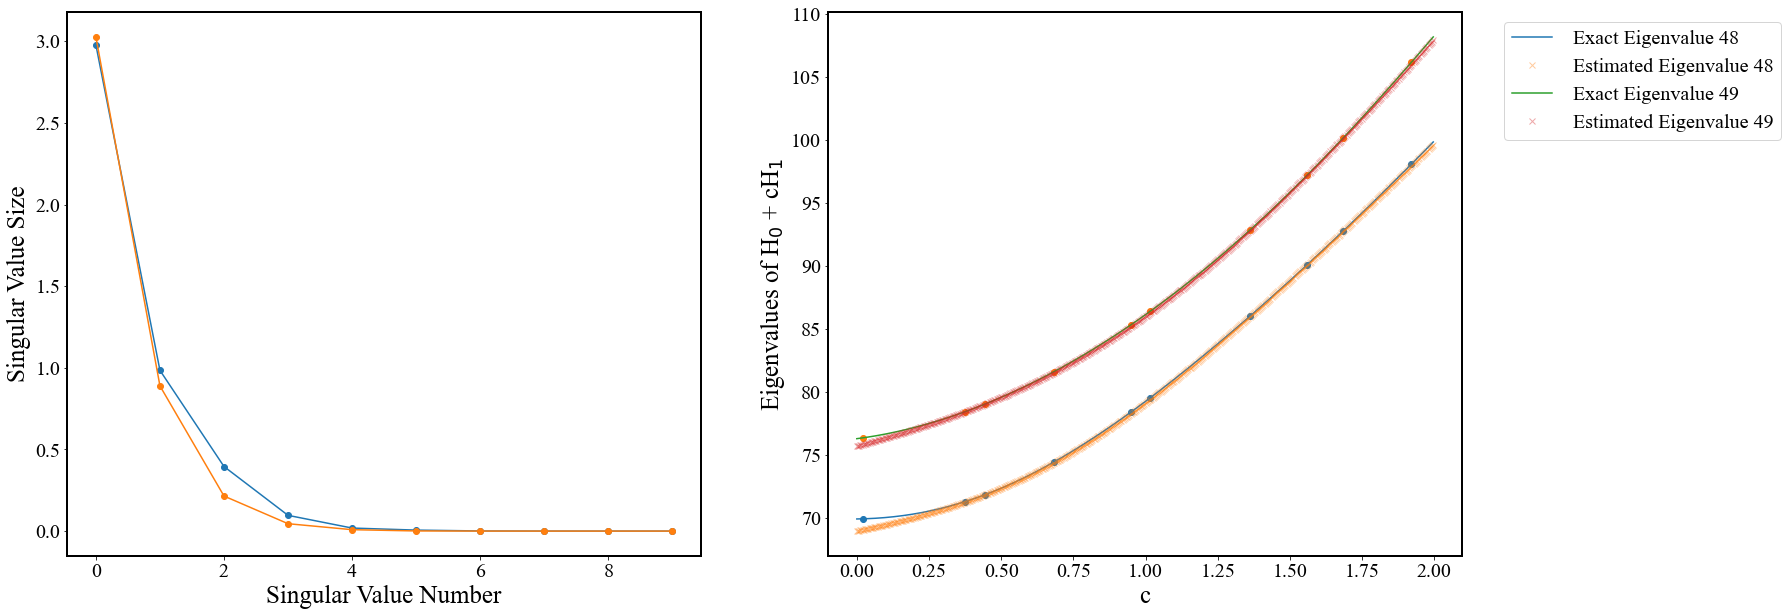

In [32]:
# Collect eigenvalues of H_0 + c*H_1 for a range of c values
cmax = 2
c_vals = 500
n_rand = 10
sampleStep = int(c_vals/n_rand)
randoms = np.array([np.random.randint(i*sampleStep, (i+1)*sampleStep) for i in range(n_rand)])             # Randomly chosen values of c for sampling in RBM
c_samples = np.sort(np.array(list(set(randoms))))                                                          # Remove any duplicate numbers and order them by size
num_samples = len(c_samples)
step = cmax/c_vals                                                                                         # Interval between adjacent values of c
ExactEigVals = np.empty((dim, c_vals))                                                                     # Exact eigenvalues of eigenvalue problem
ExactEigVecs = np.empty((dim, dim, c_vals), dtype='complex')
sampleEigVals = np.empty((dim, num_samples))
X = np.empty((dim, num_samples, dim), dtype='complex')                                                     # Collection of sampled exact eigenvectors
sample_index = 0                                                                                           # Index to keep track of which sample we are at
for i in range(c_vals):
    c = i*step
    ExactEigVals[:, i], ExactEigVecs[:, :, i] = np.linalg.eigh(H0 + c*H1)
    if sample_index < num_samples and i == c_samples[sample_index]:
        for j in range(dim):
            X[:, sample_index, j] = ExactEigVecs[:, j, i]                                                                #
            sampleEigVals[j, sample_index] = ExactEigVals[j, i]
        sample_index += 1

# Perform SVD of sampled ground state wavefunctions, generate ground state estimator and Hamiltonian estimators
subspaceDim = 2                                                                                 # Dimension of our reduced subspace
allSV = np.empty((dim, num_samples))
estWaves =np.zeros((dim, subspaceDim, dim), dtype='complex')                                    # Estimator of wavefunctions
H0est = np.empty((subspaceDim, subspaceDim, dim), dtype='complex')
H1est = np.empty((subspaceDim, subspaceDim, dim), dtype='complex')
for i in range(dim):
    U, Svec, Vt = np.linalg.svd(X[:, :, i])                                                          # SVD of sampled eigenvectors
    allSV[i, :] = Svec
    for j in range(subspaceDim):
        estWaves[:, j, i] =  U[:,j]

for i in range(dim):
    for j in range(subspaceDim):
        for k in range(subspaceDim):
            H0est[j, k, i] = np.dot(estWaves[:,j, i].T.conj(), np.dot(H0, estWaves[:,k, i]))
            H1est[j, k, i] = np.dot(estWaves[:,j, i].T.conj(), np.dot(H1, estWaves[:,k, i]))

print(np.shape(H0est))
estEigVals = np.empty((dim, c_vals))
for i in range(c_vals):
    for j in range(dim):
        estEigVals[j, i] = np.linalg.eig(H0est[:, :, j] + i*step*H1est[:, :, j])[0][0]

# Plot results
crange = np.empty(c_vals)
for i in range(c_vals):
    crange[i] = i*step

f, ax = plt.subplots(nrows = 1, ncols=2)
f.set_figwidth(25)
f.set_figheight(10)
ax[0].set_xlabel('Singular Value Number')
ax[0].set_ylabel('Singular Value Size')

for i in range(dim-2,dim):
    ax[0].plot([j for j in range(len(Svec))], allSV[i, :], marker="o")
    ax[1].plot(crange, ExactEigVals[i, :], label=' Exact Eigenvalue %i' %i)
    ax[1].plot(crange, estEigVals[i, :], 'x',  label=' Estimated Eigenvalue %i' %i, alpha=0.4)
    if i == 0:
        ax[1].scatter(step*c_samples, sampleEigVals[i, :], label=' Sampled Eigenvalues')
    ax[1].scatter(step*c_samples, sampleEigVals[i, :])

plt.xlabel('c')
plt.ylabel('Eigenvalues of H$_0$ + cH$_1$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=20).set_alpha(1)
plt.show()

In [74]:
# Make Random Hermitian Matrices H_0, H_1 and H_2
dim = 20
elementSize = 10 
H0 = randH(dim, elementSize)
H1 = randH(dim,elementSize/2)
H2 = randH(dim,elementSize/2)

(100, 100)


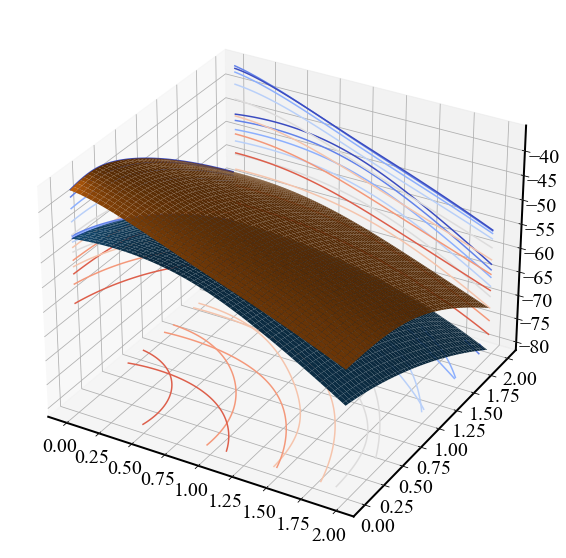

In [82]:
# Collect eigenvalues of H_0 + c_1*H_1 + c_2*H_2for a range of c values
cmax = 2
c_vals = 100
step = cmax/c_vals                                                                                                 # Interval between adjacent values of c
ExactEigVals = np.empty((dim, c_vals, c_vals))                                                                     # Exact eigenvalues of eigenvalue problem
ExactEigVecs = np.empty((dim, dim, c_vals, c_vals), dtype='complex')                                                                                      # Index to keep track of which sample we are at
for i in range(c_vals):
    c2 = i*step
    for j in range(c_vals):
        c1 = j*step
        ExactEigVals[:, i, j], ExactEigVecs[:, :, i, j] = np.linalg.eigh(H0 + c1*H1 + c2*H2)

# Plot results
crange = np.empty(c_vals)
for i in range(c_vals):
    crange[i] = i*step

"""
f, ax = plt.subplots(nrows = 1, ncols=2)
f.set_figwidth(25)
f.set_figheight(10)
ax[0].set_xlabel('Singular Value Number')
ax[0].set_ylabel('Singular Value Size')
"""
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
z = ExactEigVals[0, :, :].reshape(len(crange), len(crange))
x, y = np.meshgrid(crange, crange)
print(z.shape)
for i in range(2):
    z = ExactEigVals[i, :, :].reshape(len(crange), len(crange))
    ax.plot_surface(x, y ,z)
    ax.contour(x, y,  z, zdir='z', offset=-80, cmap='coolwarm')
    ax.contour(x, y,  z, zdir='x', offset=0, cmap='coolwarm')
    ax.contour(x, y,  z, zdir='y', offset=2, cmap='coolwarm')


plt.show()